In [1]:
import pandas as pd
#df = pd.read_parquet('sources/metadata.parquet', engine='pyarrow')
#df_large = pd.read_parquet('sources/metadata-large.parquet', engine='pyarrow')

exact_matches = pd.read_parquet("../results/artists_exact_match_large.parquet", engine='pyarrow')
assert "artists" in exact_matches.columns, f'artists is not in {exact_matches.columns}'
assert "num_artists" in exact_matches.columns, f'num_artists is not in {exact_matches.columns}'


# read excel_artist_names
import my_utils

excel_artist_names = my_utils.read_lines_as_list("../sources/excel_artists_copy_paste_name.txt")
hundred_artist_names = excel_artist_names[0:100]
ten_artist_names = excel_artist_names[0:10]


artist_mentions = pd.read_parquet('../results/artist_mentions.parquet', engine='pyarrow')

In [ ]:
df.shape

In [ ]:
len(df["prompt"].unique())

# Artist Mentions

In [3]:

search_padding = 10

# we could try to check if some of the artists are more refered to by their last name
print(f'{artist_mentions.loc[ artist_mentions["mentions"] == 0 ].shape[0]} artists were not mentioned')
print("artists with no exact match:")
for artist_row in artist_mentions.loc[ artist_mentions["mentions"] == 0 ].iterrows():
    
    name = artist_row[1]['artist'].lower()
    
    lastname = name.split(" ")[-1]
    print(f'{name} --> lastname: {lastname}')
    lastname_matches = my_utils.search_prompt_splits(exact_matches, lastname)
    if lastname_matches.shape[0] > 0:
        #print(lastname_matches["prompt"].head())
        for index, row in lastname_matches.iterrows():
            prompt = row['prompt'].lower()
            startindex = prompt.index(lastname) -search_padding if prompt.index(lastname) - search_padding > 0 else 0
            end = prompt.index(lastname) + len(lastname) + search_padding if prompt.index(lastname) + len(lastname) + search_padding < len(prompt) else len(prompt)
            print(f'partial match: {prompt[startindex:end]}')

# We can see, that the lastname is not a good enough decision.

            
            

653 artists were not mentioned
artists with no exact match:
josh adamski --> lastname: adamski


KeyboardInterrupt: 

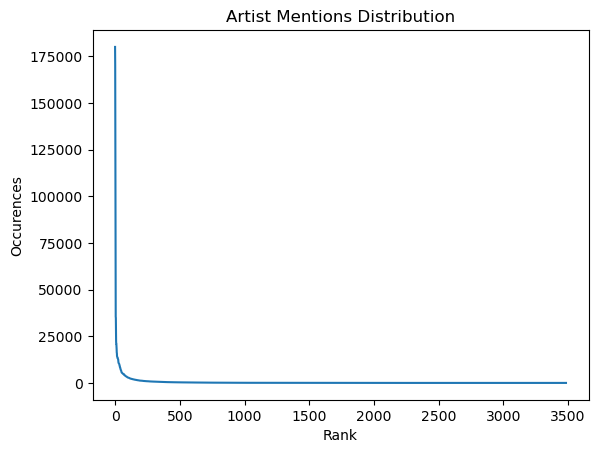

In [5]:

import matplotlib.pyplot as plt
import pandas as pd

occs = pd.read_parquet('../results/artist_mentions.parquet', engine='pyarrow')


x_data = range(occs.shape[0])
y_data = [x[1]["mentions"] for x in occs.iterrows()]
y_data.sort(reverse=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_data, y_data)
ax.set_xlabel('Rank')
ax.set_ylabel('Occurences')
ax.set_title('Artist Mentions Distribution')

plt.show()


In [ ]:
import my_utils


pd.options.display.max_colwidth = 1000

name = "greg rutkowski"
exact_matches = my_utils.exact_match_dataframe(df, name)

print(f'{name} exact match found {exact_matches.shape[0]} times')
print(f'some prompts:')
print(exact_matches.head(10)["prompt"])

## Top Artist exact matching

total mentions 1899758
top 10 artists
                      artist  mentions   percent
1999          Greg Rutkowski    180080  9.479102
3294  Trending on artstation    170077  8.952561
99                   Artgerm    136220  7.170387
1648          Alphonse Mucha     81170  4.272649
3266                    WLOP     63075  3.320160
1322          Ilya Kuvshinov     35400  1.863395
2104          Makoto Shinkai     34900  1.837076
1155              James Jean     26144  1.376175
189                   Beeple     22363  1.177150
1608                 Moebius     20856  1.097824


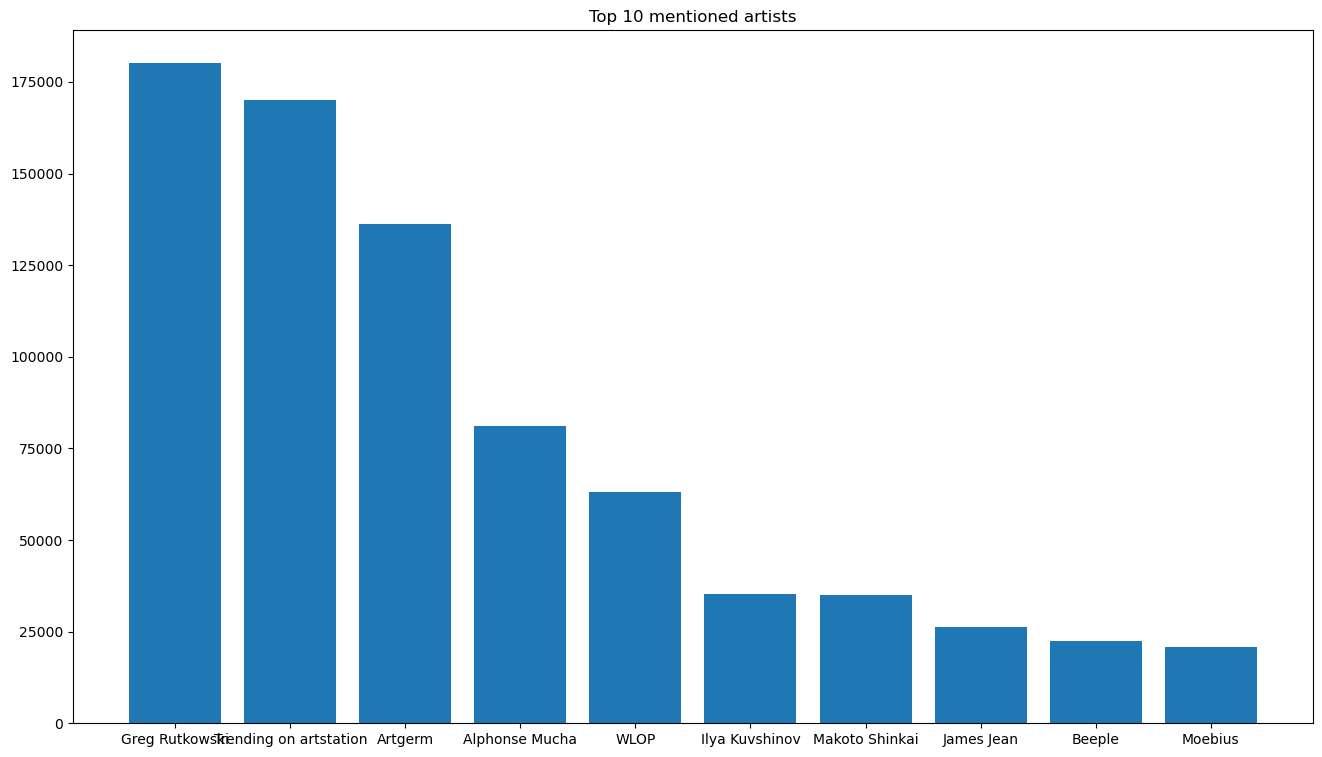

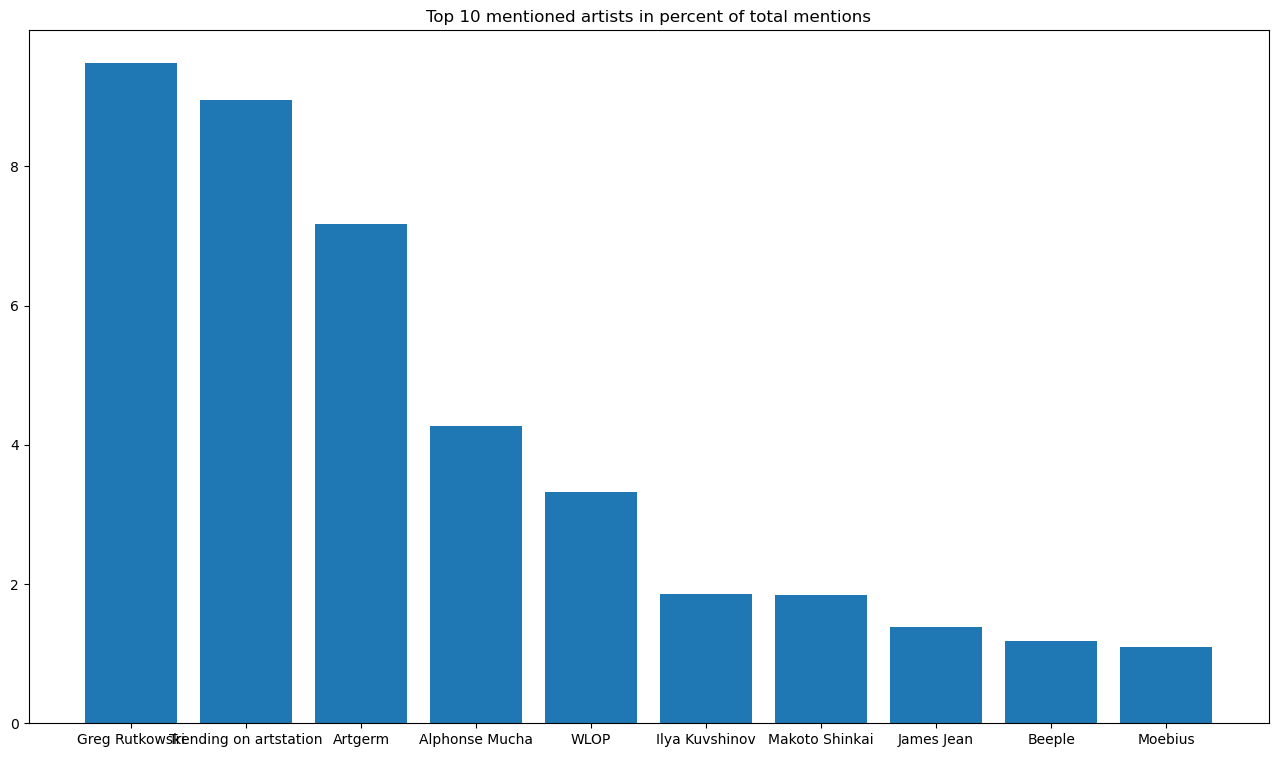

In [4]:
import matplotlib.pyplot as plt

top = 10

artist_mentions.sort_values("mentions", axis=0, ascending=False, inplace=True)


mentions_sum = artist_mentions["mentions"].sum(axis=0)
print(f'total mentions {mentions_sum}')
artist_mentions["percent"] = artist_mentions["mentions"] / mentions_sum * 100

print(f'top {top} artists')
print(artist_mentions.head(top))

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x for x in artist_mentions["artist"].iloc[0:top]]
values = [x for x in artist_mentions["mentions"].iloc[0:top]]
ax.bar(names,values)
ax.set_title(f'Top {top} mentioned artists')
plt.show()


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x for x in artist_mentions["artist"].iloc[0:top]]
values = [x for x in artist_mentions["percent"].iloc[0:top]]
ax.bar(names,values)
ax.set_title(f'Top {top} mentioned artists in percent of total mentions')
plt.show()

In [ ]:

import matplotlib.pyplot as plt

mean_num_artists = exact_matches["num_artists"].mean(axis=0)
print("mention description")
print(exact_matches["num_artists"].describe())
print(f'on average {mean_num_artists} are mentioned per prompt')

print(f'{exact_matches["num_artists"].sum(axis=0)} total mentions')
  
# labels
labels  = exact_matches["num_artists"].unique()
labels.sort()
  
# values
values = [exact_matches[exact_matches["num_artists"]==x].shape[0] for x in labels]
  
for l, v in zip(labels, values):
    print(f'{v} prompts had {l} artists found')
    
    

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(labels))

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution')

plt.show()

aggregate_labels = ["zero artists", "one artist", "two or more artists"]
aggregate_values = [exact_matches[exact_matches["num_artists"]==0].shape[0], exact_matches[exact_matches["num_artists"]==1].shape[0], exact_matches[exact_matches["num_artists"]>=2].shape[0]]

print(f'analysis of mention categories')
for l, v in zip(aggregate_labels, aggregate_values):
    print(f'{v} prompts had {l} found')

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(aggregate_labels))

ax.barh(y_pos, aggregate_values, align='center')
ax.set_yticks(y_pos, labels=aggregate_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution aggregate')

plt.show()



# Visualize as a network
# https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9
# take the higher correlations as to be edges in an adjacency matrix

import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

network 


# Co-occurrences

## For prompts with 2 or more mentioned painters

/tmp/ipykernel_1091333/633578282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  painter_names["artist"] = painter_names["artist"].apply(lambda x: x.lower())


2831 artists with more than 0 mentions:                       artist  mentions
1999          greg rutkowski    180080
3294  trending on artstation    170077
99                   artgerm    136220
1648          alphonse mucha     81170
3266                    wlop     63075
...                      ...       ...
2661        george bouzianis         1
2378     adriaen van utrecht         1
2453      james thomas watts         1
2318     charles tunnicliffe         1
949         francesco guardi         1

[2831 rows x 2 columns]
occurences
Index(['prompt', 'image_name', 'greg rutkowski', 'trending on artstation',
       'artgerm', 'alphonse mucha', 'wlop', 'ilya kuvshinov', 'makoto shinkai',
       'james jean', 'beeple', 'moebius'],
      dtype='object')
exact_matches columns Index(['prompt', 'image_name', 'user_name', 'artists', 'num_artists'], dtype='object')
T shape (1819808, 10)
    trending on artstation  greg rutkowski  alphonse mucha  artgerm  \
0                      0.0        

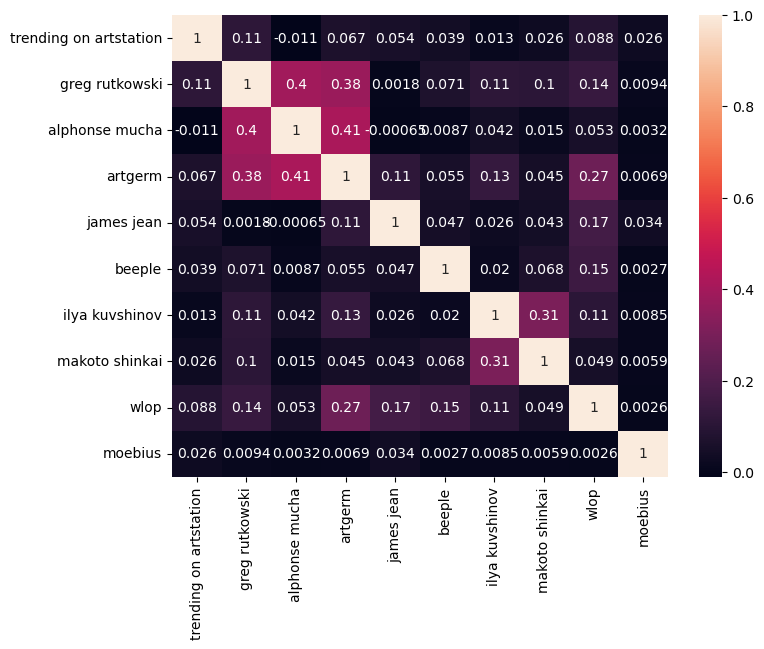

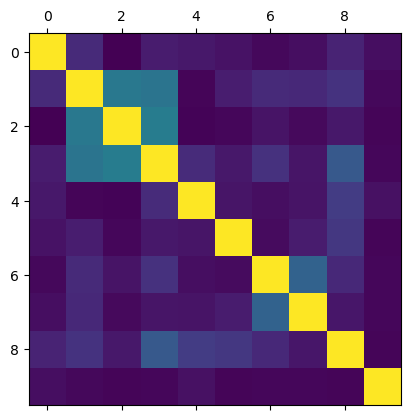

covariance:
                        trending on artstation  greg rutkowski  \
trending on artstation                0.084724        0.009497   
greg rutkowski                        0.009497        0.089163   
alphonse mucha                       -0.000644        0.024366   
artgerm                               0.005145        0.029611   
james jean                            0.001887        0.000065   
beeple                                0.001263        0.002323   
ilya kuvshinov                        0.000510        0.004587   
makoto shinkai                        0.001050        0.004281   
wlop                                  0.004687        0.007546   
moebius                               0.000802        0.000298   

                        alphonse mucha   artgerm  james jean    beeple  \
trending on artstation       -0.000644  0.005145    0.001887  0.001263   
greg rutkowski                0.024366  0.029611    0.000065  0.002323   
alphonse mucha                0.042614 

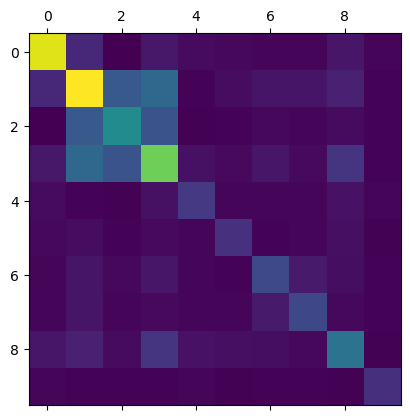

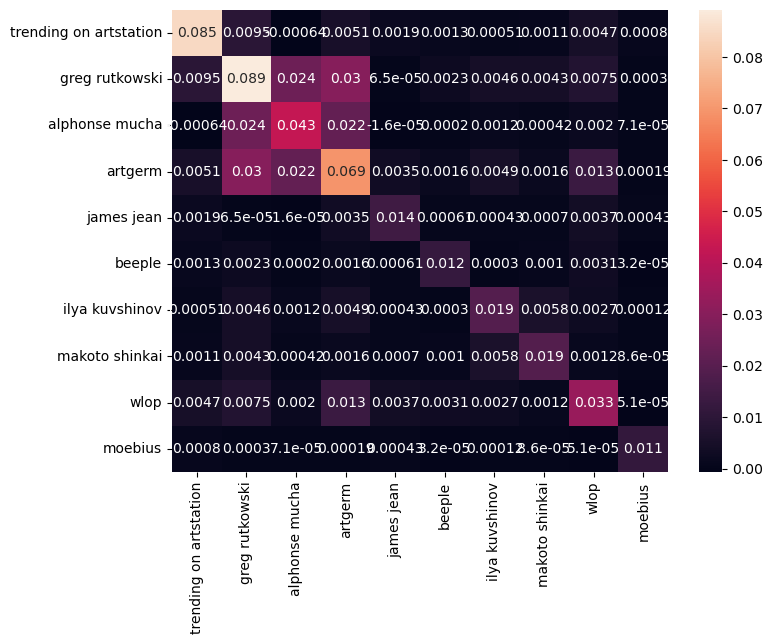

extracting finished


In [2]:
import numpy as np
import matplotlib.pyplot as plt

artist_mentions.sort_values("mentions", axis=0, ascending=False, inplace=True)
painter_names = artist_mentions.loc[artist_mentions["mentions"] > 0 ]

painter_names["artist"] = painter_names["artist"].apply(lambda x: x.lower()) 
print(f'{len(painter_names)} artists with more than 0 mentions: {painter_names}')
painter_names = painter_names["artist"].to_list()
# painters with more than one mention

# remove this restriction later (or do the analysis only for the top x artists)
painter_names = painter_names[0:10]


cols = ["prompt", "image_name"]

occurences =  pd.DataFrame(columns=cols)
for name in painter_names:
    # create new column for each painter with default value 0
    #occurences[painter_names] = 0
    occurences[name] = pd.Series(dtype=np.float64)
    occurences = occurences.copy()

print("occurences")
print(occurences.columns)

print(f'exact_matches columns {exact_matches.columns}')


# TODO remove this n
#n = 10000
#cp = exact_matches.head(n).copy()
#assert cp.shape[0] == n


cp = exact_matches.copy()

#cp = exact_matches.head(10000).copy()
#print("WARNING currently only 10000 entries")
# the notebook is capable of analysing all!


#print(f'shape before num_artists cut {cp.shape}')
# this cut is not needed, great !!!
#cp = cp[cp["num_artists"]>=2]
#print(f'shape after num_artists cut {cp.shape}')


t = cp["artists"].apply(lambda x: pd.Series([1 for _ in range(len(set(painter_names).intersection(x)))], index=set(painter_names).intersection(x), dtype=np.float64))#.copy()#, axis=1)
t = t.fillna(0)


print(f'T shape {t.shape}')
print(t.head())

print("correlation:")
# https://www.w3resource.com/pandas/dataframe/dataframe-cov.php
corr = t.corr()
print(corr)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

plt.matshow(corr)
plt.show()

print("covariance:")
# https://www.w3resource.com/pandas/dataframe/dataframe-cov.php
cov = t.cov()
print(cov)

plt.matshow(cov)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cov, annot=True)
plt.show()

print(("extracting finished"))

# Visualising corr and cov matrix
# https://www.delftstack.com/howto/python-pandas/pandas-correlation-matrix/?utm_content=cmp-true




In [3]:
# Visualize as a network
# https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9
# take the higher correlations as to be edges in an adjacency matrix

import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx


am_cp = artist_mentions.copy()
am_cp["artist"] = am_cp["artist"].str.lower()
am_cp = am_cp.set_index("artist")

print(am_cp.head(len(painter_names)))

network_positive = nx.Graph()
for pn in painter_names:
    #print(pn)
    #print(am_cp.loc[pn].mentions)
    network_positive.add_node(pn, size = am_cp.loc[pn].mentions)

for pn1 in painter_names:
    for pn2 in painter_names:
        if pn1 != pn2:
            #print(f'corr between {pn1} and {pn2} is {corr[pn1][pn2]}')
            network_positive.add_edge(pn1, pn2, weight = corr[pn1][pn2])

pos_ = nx.spring_layout(network_positive)

# Custom function to create an edge between node x and node y, with a given text and width
def make_edge(x, y, text, width, positive):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue' if positive else 'red'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in network_positive.edges():
    #print(f'Edge {edge} with weight {network_positive.edges()[edge]["weight"]}')
    if network_positive.edges()[edge]['weight'] > 0:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]
        text   = char_1 + '--' + char_2 + ': ' + str(network_positive.edges()[edge]['weight'])
        #print(f'weight {network_positive.edges()[edge]["weight"]}')
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                           width = network_positive.edges()[edge]['weight'] * 10, positive=True) #**1.75)
        edge_trace.append(trace)
    if network_positive.edges()[edge]['weight'] < 0:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]
        text   = char_1 + '--' + char_2 + ': ' + str(- network_positive.edges()[edge]['weight'])
        #print(f'weight {network_positive.edges()[edge]["weight"]}')
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                           width = - network_positive.edges()[edge]['weight'] * 10, positive=False) #**1.75)
        edge_trace.append(trace)


# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
print("nodes")
print(network_positive.nodes())

max_size = 0
for node in network_positive.nodes():
    if network_positive.nodes()[node]['size'] > max_size:
        max_size = network_positive.nodes()[node]['size']

# For each node in network_positive, get the position and size and add to the node_trace
for node in network_positive.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    #print(f'node {node}')
    #print(network_positive.nodes()[node])
    #print(network_positive.nodes()[node]['size'])
    node_trace['marker']['size'] += tuple([network_positive.nodes()[node]['size']/max_size * 100])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

    
    # Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
#print("node trace")
#print(node_trace)    
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)

fig.write_html("artist_correlation_network.html")

print("network saved to file")

                        mentions
artist                          
greg rutkowski            180080
trending on artstation    170077
artgerm                   136220
alphonse mucha             81170
wlop                       63075
ilya kuvshinov             35400
makoto shinkai             34900
james jean                 26144
beeple                     22363
moebius                    20856
nodes
['greg rutkowski', 'trending on artstation', 'artgerm', 'alphonse mucha', 'wlop', 'ilya kuvshinov', 'makoto shinkai', 'james jean', 'beeple', 'moebius']
network saved to file


In [ ]:
import time

c = 0
starttime = time.time()
for _, entry in cp.iterrows():
    #print(entry)
    new_row = dict()
    new_row['image_name'] = entry['image_name']
    new_row['prompt'] = entry['prompt']
    #for name in painter_names:
    #    new_row[name] = 0
    
    # set to one for each painter that really occured
    for name in entry['artists']:
        if name in painter_names:
            new_row[name] = 1
    
    new_row = pd.Series(new_row)
    #print(new_row)
    
    occurences = pd.concat([occurences, new_row.to_frame().T], ignore_index=True)#.copy()
    # copy to defragment the dataframe
    
    c+=1
    if c% 10000 == 0:
        duration = time.time() - starttime
        print(f'{c} {duration / 60} minutes passed, {duration/c} seconds per entry, approximately {duration/c * (cp.shape[0] - c) / 60 / 60} hours remaining')
    
occurences.fillna(0)